# Gold Recovery Analysis

This project aims to develop a machine learning model to predict gold recovery from ore for Zyfra, a company focused on efficiency in heavy industry. 

Using raw data from gold extraction and purification, we will clean, analyze, and build a model to optimize production and eliminate unprofitable parameters. 

The data is provided in three files, with some features missing from the test set. 

The project will utilize `pandas`, `numpy`, `matplotlib`, and `scikit-learn` to prepare the data and develop the model.


# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Prepare the data

## Open the files

In [2]:
# Full dataset - `gold_recovery_full.csv` 
data_full = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv')

In [3]:
display(data_full.shape)
display(data_full.info())
display(data_full.head())

(22716, 87)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


None

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
# Test data - `gold_recovery_full.csv`
data_test = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv')

In [5]:
data_test.shape
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [6]:
# Training data - `gold_recovery_full.csv`
data_train = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv')

In [7]:
data_train.shape
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


##  Check that Recovery is calculated correctly

- Using the training set, calculate recovery for the rougher.output.recovery feature.

- Find MAE between your calculations and the feature values

In [8]:
data_train['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

In [9]:
rougher_recovery_df = data_train[['rougher.output.concentrate_au',
                                  'rougher.input.feed_au',
                                  'rougher.output.tail_au',
                                  'rougher.output.recovery']]
rougher_recovery_df.head()

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery
0,19.793808,6.486150,1.170244,87.107763
1,20.050975,6.478583,1.184827,86.843261
2,19.737170,6.362222,1.162562,86.842308
3,19.320810,6.118189,1.079755,87.226430
4,19.216101,5.663707,1.012642,86.688794


In [10]:
rougher_recovery_df = rougher_recovery_df.dropna()

### Calculate Recovery - Rougher

In [11]:
C = rougher_recovery_df['rougher.output.concentrate_au']
F = rougher_recovery_df['rougher.input.feed_au']
T = rougher_recovery_df['rougher.output.tail_au']

recovery_rougher = ((C * (F- T)) / (F * (C-T))) * 100   # rougher recovery

In [12]:
rougher_recovery_df['rougher.output.recovery_calc'] = recovery_rougher
rougher_recovery_df.head(20)

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,rougher.output.recovery_calc
0,19.793808,6.486150,1.170244,87.107763,87.107763
1,20.050975,6.478583,1.184827,86.843261,86.843261
2,19.737170,6.362222,1.162562,86.842308,86.842308
3,19.320810,6.118189,1.079755,87.226430,87.226430
4,19.216101,5.663707,1.012642,86.688794,86.688794
5,18.950385,5.687168,0.915835,88.156912,88.156912
6,19.319591,6.038436,0.986248,88.168065,88.168065
7,19.507897,6.433854,1.116110,87.668336,87.668336
8,19.789465,6.526612,1.186780,87.035862,87.035862
9,19.497669,6.633002,1.167140,87.650868,87.650868


In [13]:
from sklearn.metrics import mean_absolute_error
mae =  mean_absolute_error(rougher_recovery_df['rougher.output.recovery'], rougher_recovery_df['rougher.output.recovery_calc'])
mae

9.303415616264301e-15

The MAE value is very small for the recovery (rougher) and indicates that the 'rougher.output.recovery' column is being calculated correctly.

## Analyze the Features not available in the test set


In [14]:
shape_difference = data_train.shape != data_test.shape
shape_difference

True

In [15]:
# Identify columns that are present in the training set, but not in the test set
columns_data_train = data_train.columns
columns_data_test = data_test.columns

missing_from_data_test = columns_data_train[~columns_data_train.isin(columns_data_test)]
missing_from_data_test

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

Confirmed. `'rougher.output.concentrate_au'` and `'final.output.concentrate_au'` are only available in the training set.

Checking the column differences between the full data set and the training set.

In [16]:
print(data_full.shape)
print(data_train.shape)

# Check for differences in the columns
columns_data_full = data_full.columns

missing_from_data_full = columns_data_full[~columns_data_full.isin(columns_data_train)]
print(missing_from_data_full)

(22716, 87)
(16860, 87)
Index([], dtype='object')


The test dataset is missing columns found in the training set. What we have in the test set is a lot of information about the inputs. Some information about the primary cleaning and some about the secondary cleaning stages. Since the inputs determine the outputs, 

The full dataset has the same columns as the training dataset, but there are more rows of data available in the full dataset.

There are more feature columns available than what appear to be necessary to predict the amount of gold recovered from gold ore. It seems some unnessary features might be removed later on. 

##  Preprocess the data


### Training data preprocessing

In [17]:
# Summary of missing values for each column
missing_summary = data_train.isna().sum().sort_values(ascending=False)

# Show columns with missing values and their counts
missing_summary[missing_summary > 0]

rougher.output.recovery                               2573
rougher.output.tail_ag                                2250
rougher.output.tail_sol                               2249
rougher.output.tail_au                                2249
secondary_cleaner.output.tail_sol                     1986
                                                      ... 
primary_cleaner.state.floatbank8_b_level                27
primary_cleaner.state.floatbank8_c_level                27
primary_cleaner.state.floatbank8_d_level                27
rougher.calculation.floatbank10_sulfate_to_au_feed      27
rougher.calculation.floatbank11_sulfate_to_au_feed      27
Length: 85, dtype: int64

In [18]:
# Check for duplicates
data_train.duplicated().sum()

0

In [19]:
missing_target_values = data_train[['rougher.output.recovery', 'final.output.recovery']].isna().sum()
missing_target_values

rougher.output.recovery    2573
final.output.recovery      1521
dtype: int64

In [20]:
# Drop rows where target columns have NaNs
data_train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

In [21]:
nan_counts = data_train.isna().sum()[data_train.isna().sum() > 0].sort_values(ascending=False)
nan_counts

secondary_cleaner.output.tail_sol             1605
rougher.state.floatbank10_e_air                436
rougher.input.floatbank11_xanthate             428
primary_cleaner.output.concentrate_sol         286
secondary_cleaner.state.floatbank2_a_air       217
                                              ... 
rougher.state.floatbank10_a_air                  1
rougher.state.floatbank10_a_level                1
rougher.state.floatbank10_b_air                  1
rougher.state.floatbank10_b_level                1
secondary_cleaner.state.floatbank6_a_level       1
Length: 62, dtype: int64

In [22]:
missing_percentage = data_train.isna().mean() * 100

# Set a threshold for large missing values (e.g., more than 20%)
threshold = 10

# Filter columns where missing values exceed the threshold
columns_to_show = missing_percentage[missing_percentage > threshold].index
columns_to_show

Index(['secondary_cleaner.output.tail_sol'], dtype='object')

Text(0, 0.5, 'Concentration')

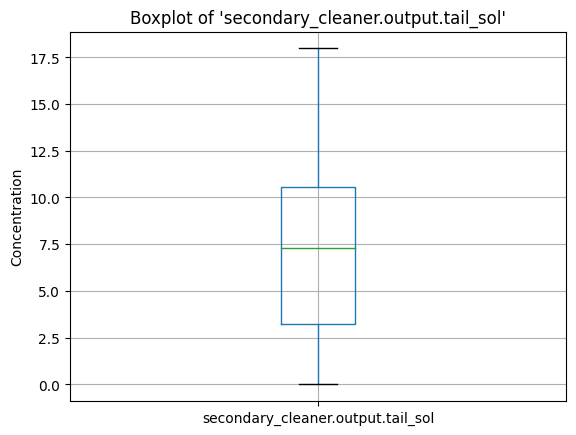

In [23]:
data_train.boxplot(column='secondary_cleaner.output.tail_sol')
plt.title("Boxplot of 'secondary_cleaner.output.tail_sol'")
plt.ylabel("Concentration")

The data in 'secondary_cleaner.output.tail_sol' has a long upper whisker, which suggests it's not normally distributed. 

Text(0.5, 1.0, "Frequency of 'secondary_cleaner.output.tail_sol' Values ")

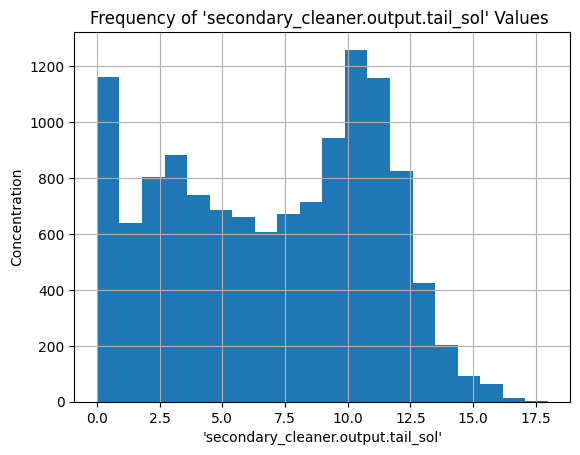

In [24]:
data_train.hist(column = 'secondary_cleaner.output.tail_sol', bins=20)
plt.xlabel("'secondary_cleaner.output.tail_sol'")
plt.ylabel("Concentration")
plt.title("Frequency of 'secondary_cleaner.output.tail_sol' Values ")

In [25]:
# Change 'date' column from object to datetime
data_train['date'] = pd.to_datetime(data_train['date'])

In [26]:
# Fill the gaps with median
data_train.fillna(data_train.median(), inplace=True)


#### Reviewing datetime stamps on the training data

In [27]:
data_train_review = data_train.copy()
data_train_review['interval'] = data_train_review['date'].diff()

In [28]:
data_train_review['interval'].head()

0               NaT
1   0 days 01:00:00
2   0 days 01:00:00
3   0 days 01:00:00
4   0 days 01:00:00
Name: interval, dtype: timedelta64[ns]

In [29]:
data_train_review['interval'].describe()

count                        14148
mean     0 days 01:36:19.898148148
std      1 days 11:00:20.590266618
min                0 days 01:00:00
25%                0 days 01:00:00
50%                0 days 01:00:00
75%                0 days 01:00:00
max              122 days 01:00:00
Name: interval, dtype: object

In [30]:
print(data_train_review['interval'].dtype)

timedelta64[ns]


In [31]:
data_train_review[data_train_review['interval'] > pd.Timedelta(hours=1)]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,interval
50,2016-01-17 02:00:00,8.162896,8.877528,8.845462,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224,...,-550.563329,11.999730,-550.549773,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929,0 days 02:00:00
54,2016-01-17 06:00:00,5.311343,11.675848,6.981367,43.561270,69.818625,10.856089,1.668727,18.196195,2.485670,...,-552.217441,12.061511,-550.721468,9.951447,-499.724580,8.051438,-499.842634,11.977864,-600.718384,0 days 02:00:00
136,2016-01-20 16:00:00,6.641615,8.990178,8.845462,44.161305,64.045287,12.460954,1.905541,4.360854,3.075640,...,-550.386614,12.000013,-550.451984,9.963179,-500.873518,8.051530,-499.780601,11.956762,-599.938457,1 days 14:00:00
139,2016-01-20 19:00:00,7.153846,9.698348,8.845462,43.066187,63.423986,11.837532,1.593730,6.481931,3.048757,...,-550.169770,12.015529,-551.555211,10.072424,-499.028818,8.075196,-500.064559,11.991893,-598.901999,0 days 02:00:00
360,2016-01-30 00:00:00,10.217563,8.213873,8.845462,43.448121,64.445532,11.705448,1.702368,6.816273,3.677672,...,-500.817370,13.033446,-504.122731,13.957035,-499.149096,11.974559,-500.408153,13.983338,-500.237441,0 days 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,2018-08-10 10:59:59,0.897455,1.686572,2.632889,8.044110,78.410191,14.242726,4.015949,6.334277,3.823245,...,-501.324611,22.968957,-500.069400,20.012877,-499.619093,14.950157,-499.895104,22.993868,-803.599754,0 days 03:00:00
16675,2018-08-10 18:59:59,4.434641,9.833829,12.448390,44.617071,76.292027,10.883399,1.428165,9.328160,1.081389,...,-501.951961,23.039949,-500.144269,19.974934,-501.403661,15.033318,-500.085837,23.000363,-802.652300,0 days 02:00:00
16694,2018-08-11 13:59:59,6.041500,11.351865,6.917645,40.832564,55.896590,10.014721,1.502065,5.663889,1.337393,...,-500.578594,20.051082,-499.428394,18.014078,-500.061362,12.979803,-500.031709,17.980769,-512.422727,0 days 02:00:00
16702,2018-08-11 21:59:59,3.699690,7.841529,9.270066,48.780134,45.010348,16.502629,5.111164,10.093597,6.178627,...,-502.100577,19.990459,-501.738711,17.964325,-499.804864,12.977963,-500.194919,17.993462,-503.596034,0 days 06:00:00


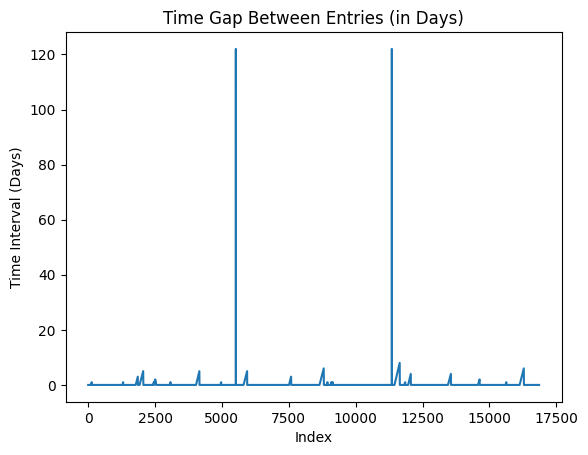

In [32]:
data_train_review['interval_days'] = data_train_review['interval'].dt.days
data_train_review['interval_days'].plot()
plt.title("Time Gap Between Entries (in Days)")
plt.xlabel("Index")
plt.ylabel("Time Interval (Days)")
plt.show()

Looking at the datetime stamp information, we can see there gaps in the dataset where production wasn't happening. This suggests that using a regression model may be more appropriate since it doesn't rely on a time-based structure. 

In [33]:
# Checking our work
data_train_review.iloc[5519:5523]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,interval,interval_days
6542,2017-02-12 13:59:59,6.729249,9.204869,14.772592,44.332661,72.904010,11.769801,3.241442,11.738111,3.586043,...,23.078645,-399.317588,22.959073,-446.506189,20.019480,-449.677865,25.011736,-594.664550,0 days 01:00:00,0.0
6543,2017-02-12 14:59:59,6.472424,8.900318,14.814306,44.970208,73.307780,12.090374,3.329940,11.875503,3.565084,...,23.011706,-400.141927,22.963953,-452.598443,20.035116,-450.299365,25.002435,-604.208676,0 days 01:00:00,0.0
6544,2017-02-12 15:59:59,6.511154,8.963556,14.487461,44.513593,75.507052,12.204699,3.228605,11.645248,3.286099,...,22.987759,-399.909307,22.947867,-448.806445,19.986031,-449.709155,25.006729,-599.549713,0 days 01:00:00,0.0
6545,2017-02-12 16:59:59,6.944066,8.973018,14.753407,43.654731,74.409304,12.465255,3.233983,11.753933,3.386763,...,22.948114,-400.404279,21.304716,-436.361956,20.017398,-440.294268,25.006781,-590.735799,0 days 01:00:00,0.0


In [34]:
data_train_review.iloc[11350:11355]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,interval,interval_days
13592,2018-04-04 07:59:59,7.208357,11.038235,11.640849,41.235112,67.874101,10.158240,2.777564,7.689254,2.938703,...,13.989538,-499.849561,18.004319,-499.661782,11.952701,-499.939521,12.993514,-499.412096,0 days 01:00:00,0.0
13593,2018-04-04 08:59:59,4.994607,10.693178,11.436076,44.718534,66.544015,10.176251,2.906182,8.166957,2.934697,...,13.984968,-500.484649,18.004343,-500.488967,11.988497,-499.785698,12.981447,-499.870071,0 days 01:00:00,0.0
13594,2018-04-04 09:59:59,4.522237,10.346983,11.286095,46.077789,63.148926,10.376942,2.916101,7.781781,2.935723,...,13.980399,-499.634849,17.997858,-500.367006,12.047235,-500.135073,13.001485,-500.178036,0 days 01:00:00,0.0
13595,2018-04-04 10:59:59,4.349745,10.087863,11.064079,46.266507,62.523373,10.201113,2.506169,7.296098,2.567802,...,13.975829,-499.759450,18.003112,-500.698655,12.024931,-500.046068,12.991578,-499.938991,0 days 01:00:00,0.0
13596,2018-04-04 11:59:59,4.307604,9.880927,10.425195,47.072501,64.445319,9.940252,2.049889,7.126248,2.278326,...,13.971259,-499.627791,18.002449,-499.716222,11.991472,-499.906615,13.009812,-499.474507,0 days 01:00:00,0.0


We have a couple of gaps in the training timestamps. It looks like the training data could be grouped by year.

### Full data preprocessing

In [35]:
# Find all the NaNs
missing_data_full = data_full.isna().sum().sort_values()

# Show the columns
missing_data_full[missing_data_full > 0]

primary_cleaner.state.floatbank8_d_level                43
primary_cleaner.state.floatbank8_c_level                43
primary_cleaner.state.floatbank8_b_level                43
rougher.calculation.floatbank11_sulfate_to_au_feed      44
rougher.calculation.sulfate_to_au_concentrate           44
                                                      ... 
rougher.input.floatbank11_xanthate                    2257
rougher.output.tail_au                                2736
rougher.output.tail_sol                               2736
rougher.output.tail_ag                                2737
rougher.output.recovery                               3119
Length: 85, dtype: int64

In [36]:
data_full.duplicated().sum()

0

In [37]:
missing_target_values_full = data_full[['rougher.output.recovery', 'final.output.recovery']].isna().sum()
missing_target_values_full

rougher.output.recovery    3119
final.output.recovery      1963
dtype: int64

In [38]:
# Drop rows where target columns have NaNs
data_full.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

In [39]:
nan_counts = data_full.isna().sum()[data_full.isna().sum() > 0].sort_values(ascending=False)
nan_counts

secondary_cleaner.output.tail_sol             1748
rougher.input.floatbank11_xanthate             453
rougher.state.floatbank10_e_air                436
primary_cleaner.output.concentrate_sol         370
secondary_cleaner.state.floatbank2_a_air       220
                                              ... 
primary_cleaner.state.floatbank8_c_level         1
primary_cleaner.state.floatbank8_b_level         1
primary_cleaner.state.floatbank8_a_level         1
final.output.tail_ag                             1
secondary_cleaner.state.floatbank6_a_level       1
Length: 63, dtype: int64

In [40]:
missing_percentage = data_full.isna().mean() * 100

# Set a threshold for large missing values (e.g., more than 20%)
threshold = 10

# Filter columns where missing values exceed the threshold
columns_to_show = missing_percentage[missing_percentage > threshold].index
columns_to_show

Index([], dtype='object')

In [41]:
data_full['date'] = pd.to_datetime(data_full['date'])

In [42]:
# Fill the gaps with the median
data_full.fillna(data_full.median(), inplace=True)


### Reviewing datetime stamps on full set of data

In [43]:
data_full.sort_values(by='date')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


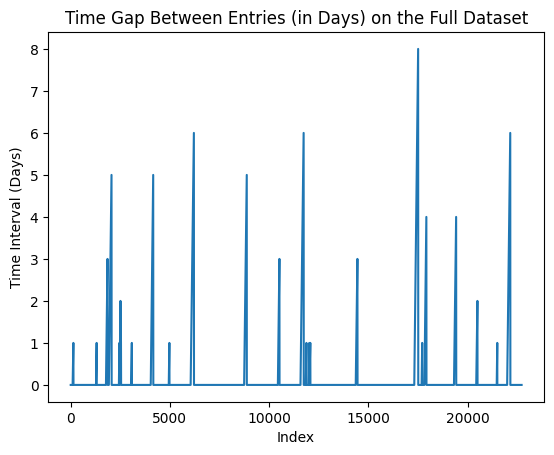

In [44]:
data_full_review = data_full.copy()
data_full_review['interval'] = data_full_review['date'].diff()

data_full_review['interval_days'] = data_full_review['interval'].dt.days
data_full_review['interval_days'].plot()
plt.title("Time Gap Between Entries (in Days) on the Full Dataset")
plt.xlabel("Index")
plt.ylabel("Time Interval (Days)")
plt.show()

In [45]:
data_full_review[data_full_review['interval'] > pd.Timedelta(hours=1)]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,interval,interval_days
50,2016-01-17 02:00:00,8.162896,8.877528,9.218961,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224,...,11.999730,-550.549773,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929,0 days 02:00:00,0.0
54,2016-01-17 06:00:00,5.311343,11.675848,6.981367,43.561270,69.818625,10.856089,1.668727,18.196195,2.485670,...,12.061511,-550.721468,9.951447,-499.724580,8.051438,-499.842634,11.977864,-600.718384,0 days 02:00:00,0.0
136,2016-01-20 16:00:00,6.641615,8.990178,9.218961,44.161305,64.045287,12.460954,1.905541,4.360854,3.075640,...,12.000013,-550.451984,9.963179,-500.873518,8.051530,-499.780601,11.956762,-599.938457,1 days 14:00:00,1.0
139,2016-01-20 19:00:00,7.153846,9.698348,9.218961,43.066187,63.423986,11.837532,1.593730,6.481931,3.048757,...,12.015529,-551.555211,10.072424,-499.028818,8.075196,-500.064559,11.991893,-598.901999,0 days 02:00:00,0.0
360,2016-01-30 00:00:00,10.217563,8.213873,9.218961,43.448121,64.445532,11.705448,1.702368,6.816273,3.677672,...,13.033446,-504.122731,13.957035,-499.149096,11.974559,-500.408153,13.983338,-500.237441,0 days 04:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22523,2018-08-10 10:59:59,0.897455,1.686572,2.632889,8.044110,78.410191,14.242726,4.015949,6.334277,3.823245,...,22.968957,-500.069400,20.012877,-499.619093,14.950157,-499.895104,22.993868,-803.599754,0 days 03:00:00,0.0
22531,2018-08-10 18:59:59,4.434641,9.833829,12.448390,44.617071,76.292027,10.883399,1.428165,9.328160,1.081389,...,23.039949,-500.144269,19.974934,-501.403661,15.033318,-500.085837,23.000363,-802.652300,0 days 02:00:00,0.0
22550,2018-08-11 13:59:59,6.041500,11.351865,6.917645,40.832564,55.896590,10.014721,1.502065,5.663889,1.337393,...,20.051082,-499.428394,18.014078,-500.061362,12.979803,-500.031709,17.980769,-512.422727,0 days 02:00:00,0.0
22558,2018-08-11 21:59:59,3.699690,7.841529,9.270066,48.780134,45.010348,16.502629,5.111164,10.093597,6.178627,...,19.990459,-501.738711,17.964325,-499.804864,12.977963,-500.194919,17.993462,-503.596034,0 days 06:00:00,0.0


### Test data preprocessing


In [46]:
# Find all the NaNs
missing_data_test = data_test.isna().sum().sort_values()

# Show the columns
missing_data_test[missing_data_test > 0]

rougher.state.floatbank10_c_level              16
rougher.state.floatbank10_d_level              16
rougher.state.floatbank10_e_level              16
rougher.state.floatbank10_f_level              16
secondary_cleaner.state.floatbank2_a_level     16
secondary_cleaner.state.floatbank2_b_level     16
secondary_cleaner.state.floatbank3_a_level     16
secondary_cleaner.state.floatbank3_b_air       16
secondary_cleaner.state.floatbank3_b_level     16
secondary_cleaner.state.floatbank4_a_air       16
secondary_cleaner.state.floatbank4_a_level     16
secondary_cleaner.state.floatbank4_b_air       16
secondary_cleaner.state.floatbank4_b_level     16
secondary_cleaner.state.floatbank5_a_air       16
secondary_cleaner.state.floatbank5_a_level     16
secondary_cleaner.state.floatbank5_b_air       16
secondary_cleaner.state.floatbank5_b_level     16
secondary_cleaner.state.floatbank6_a_air       16
rougher.state.floatbank10_a_level              16
rougher.state.floatbank10_b_level              16


In [47]:
data_test.duplicated().sum()

0

In [48]:
data_test.fillna(data_test.median(), inplace=True)

In [49]:
data_test['date'] = pd.to_datetime(data_test['date'])

In [50]:
data_test['date'].is_unique

True

In [51]:
data_test = data_test.sort_values(by='date')

In [52]:
data_test.head(20)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


#### Reviewing datetime stamps on the test data

Checking out the timestamps to see if this data might be a time series or not.

In [53]:
data_test_review = data_test.copy()
data_test_review['interval'] = data_test_review['date'].diff()

In [54]:
data_test_review['interval'].head()

0               NaT
1   0 days 01:00:00
2   0 days 01:00:00
3   0 days 01:00:00
4   0 days 01:00:00
Name: interval, dtype: timedelta64[ns]

In [55]:
data_test_review['interval'].describe()

count                         5855
mean     0 days 01:59:45.858240819
std      3 days 04:13:02.599553361
min                0 days 01:00:00
25%                0 days 01:00:00
50%                0 days 01:00:00
75%                0 days 01:00:00
max              243 days 01:00:00
Name: interval, dtype: object

In [56]:
data_test_review[data_test_review['interval'] > pd.Timedelta(hours=1)]

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,interval
2928,2017-09-01 00:59:59,189.345462,5.997663,7.15,0.743682,1351.711555,-500.26706,1347.507632,-500.619375,1353.799936,...,-497.999058,10.924549,-399.109726,14.005582,-499.589225,11.049347,-499.329125,15.020557,-500.800247,243 days 01:00:00


In [57]:
data_test_review.iloc[2926:2930]

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,interval
2926,2016-12-31 22:59:59,127.775871,8.979377,7.95,1.393694,1666.368419,-500.097726,1689.119106,-500.332558,1597.580108,...,-501.738860,15.032455,-501.353535,14.429045,-499.841079,11.984078,-500.310544,19.984266,-501.170961,0 days 01:00:00
2927,2016-12-31 23:59:59,127.135359,8.981477,7.95,1.388213,1667.275549,-500.329601,1679.509360,-500.422384,1601.081082,...,-499.323670,15.001357,-499.277198,14.317379,-499.953900,12.002354,-499.751613,19.985479,-499.227735,0 days 01:00:00
2928,2017-09-01 00:59:59,189.345462,5.997663,7.15,0.743682,1351.711555,-500.267060,1347.507632,-500.619375,1353.799936,...,-497.999058,10.924549,-399.109726,14.005582,-499.589225,11.049347,-499.329125,15.020557,-500.800247,243 days 01:00:00
2929,2017-09-01 01:59:59,199.767960,5.934489,7.15,0.741321,1351.196818,-499.529002,1347.824191,-499.888913,1353.612121,...,-500.690032,11.082623,-400.967567,13.979490,-500.195559,11.010281,-500.557729,15.010416,-500.138154,0 days 01:00:00


There is a gap in the dates of the test data. It seems that measurements ended on December 31, 2016 and then picked back up again on September 1, 2017.

This suggests that it's best to move forward treating the data as a static dataset for feature analysis... so I'll be focusing on feature relationships rather than temporal relationships in the data.

# 2. Analyze the data

## 2.1 Compare concentrations of metals at different purifcation states

Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage


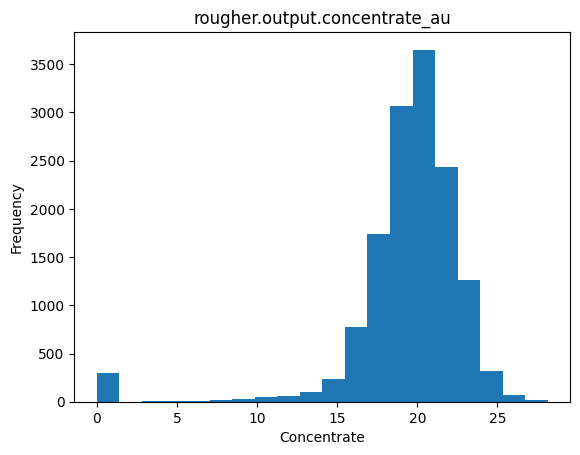

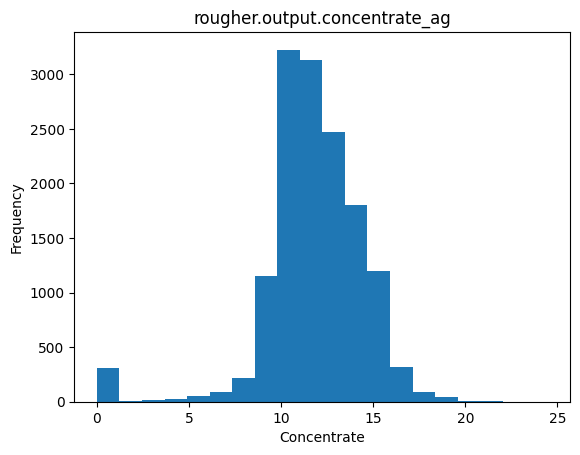

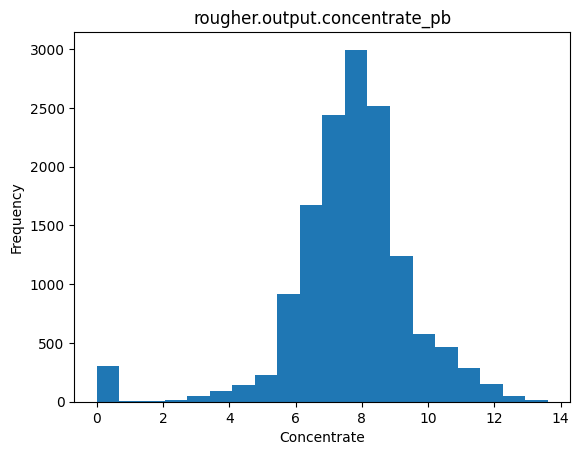

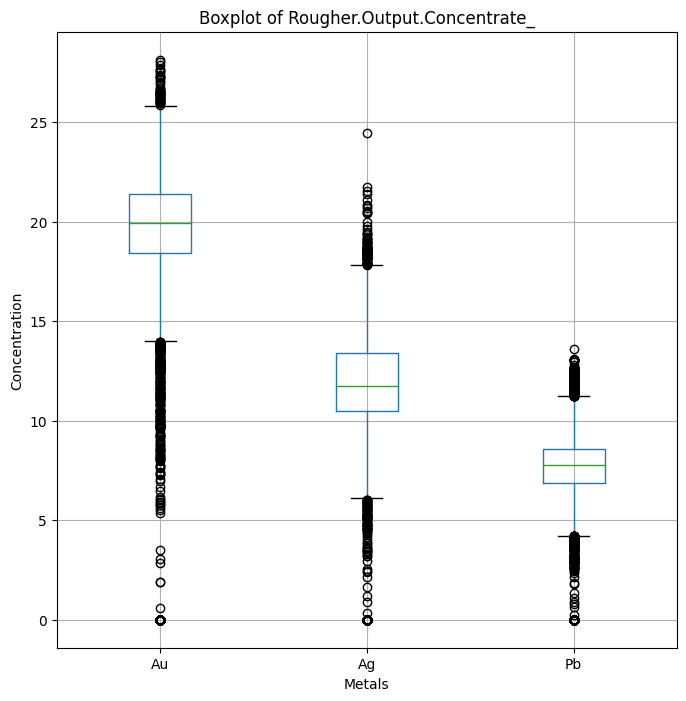

In [58]:
### Comparison of 'rougher.output.concentrate'
compare_preclean = data_train.filter(['date', 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb'], axis=1)

# au
compare_preclean['rougher.output.concentrate_au'].plot(kind='hist', bins=20, title='rougher.output.concentrate_au')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()

# ag
compare_preclean['rougher.output.concentrate_ag'].plot(kind='hist', bins=20, title='rougher.output.concentrate_ag')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()


# pb
compare_preclean['rougher.output.concentrate_pb'].plot(kind='hist', bins=20, title='rougher.output.concentrate_pb')

plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()


# Create the boxplot
plt.figure(figsize=(8, 8))
compare_preclean[['rougher.output.concentrate_au', 
                  'rougher.output.concentrate_ag', 
                  'rougher.output.concentrate_pb']].boxplot()

plt.title("Boxplot of Rougher.Output.Concentrate_")
plt.xlabel("Metals")
plt.ylabel("Concentration")
plt.xticks([1, 2, 3], ['Au', 'Ag', 'Pb'])
plt.show()

### Comparison of 'primary.cleaner.output'

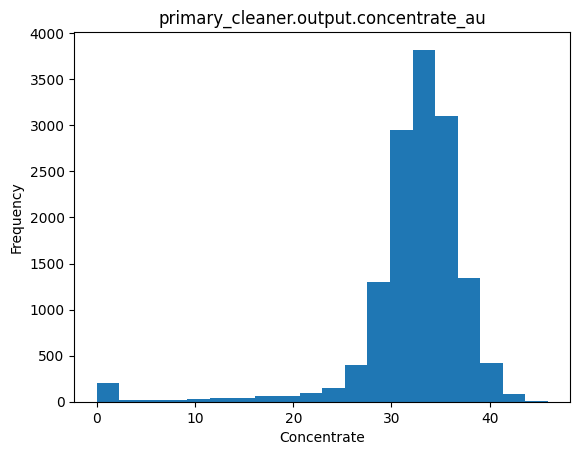

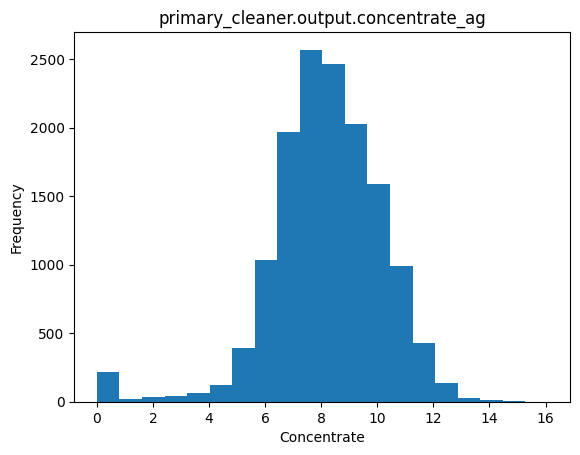

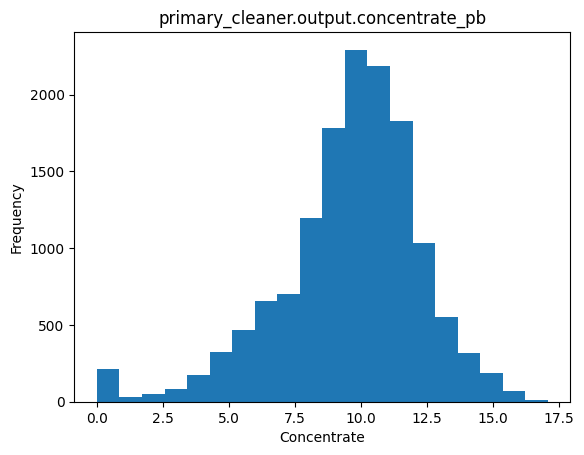

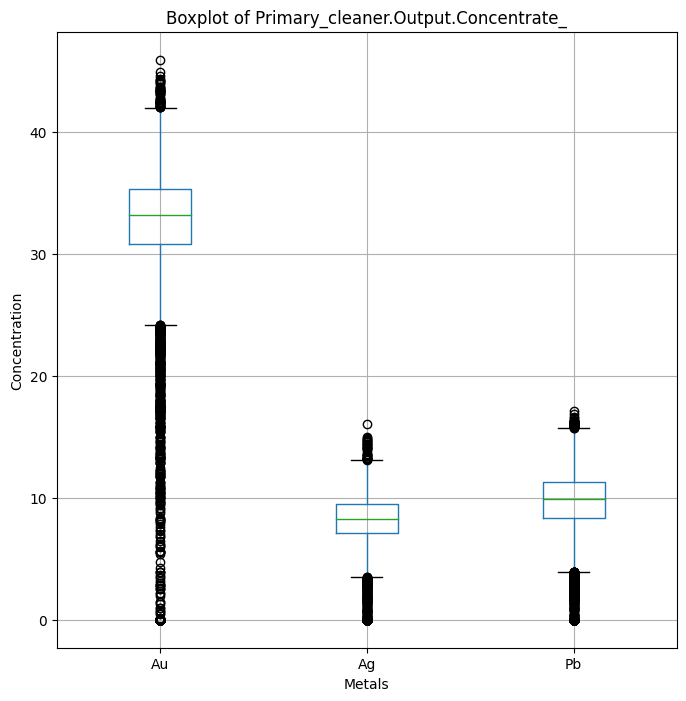

In [59]:
compare_stage1 = data_train.filter(['date', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb'], axis=1)

# au
compare_stage1['primary_cleaner.output.concentrate_au'].plot(kind='hist', bins=20, title='primary_cleaner.output.concentrate_au')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()

# ag
compare_stage1['primary_cleaner.output.concentrate_ag'].plot(kind='hist', bins=20, title='primary_cleaner.output.concentrate_ag')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()

# pb
compare_stage1['primary_cleaner.output.concentrate_pb'].plot(kind='hist', bins=20, title='primary_cleaner.output.concentrate_pb')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()


# Create the boxplot
plt.figure(figsize=(8, 8))
compare_stage1[['primary_cleaner.output.concentrate_au', 
                  'primary_cleaner.output.concentrate_ag', 
                  'primary_cleaner.output.concentrate_pb']].boxplot()

plt.title("Boxplot of Primary_cleaner.Output.Concentrate_")
plt.xlabel("Metals")
plt.ylabel("Concentration")
plt.xticks([1, 2, 3], ['Au', 'Ag', 'Pb'])
plt.show()

### Comparison of 'final.output.concentrate'

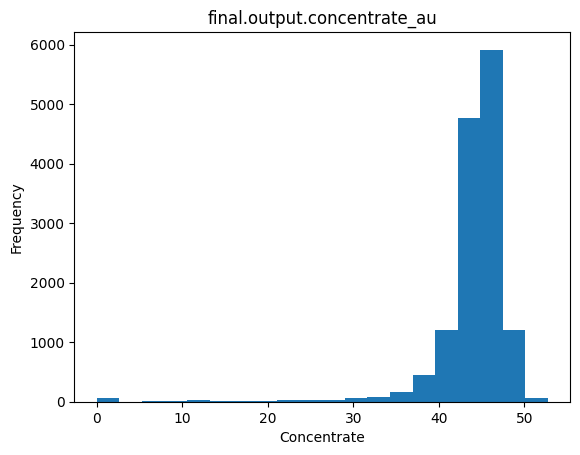

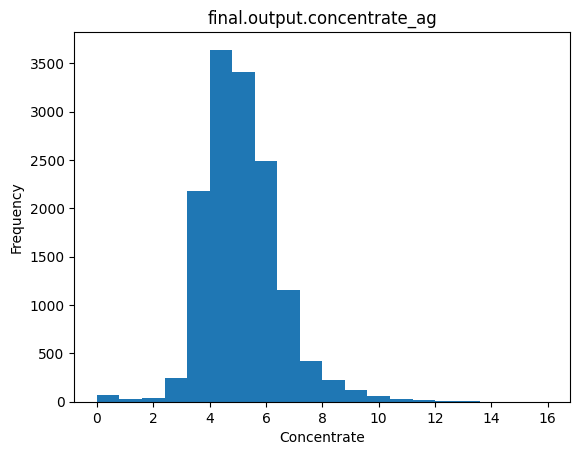

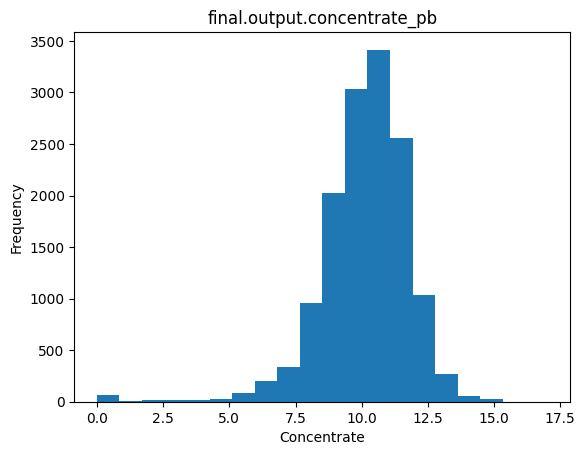

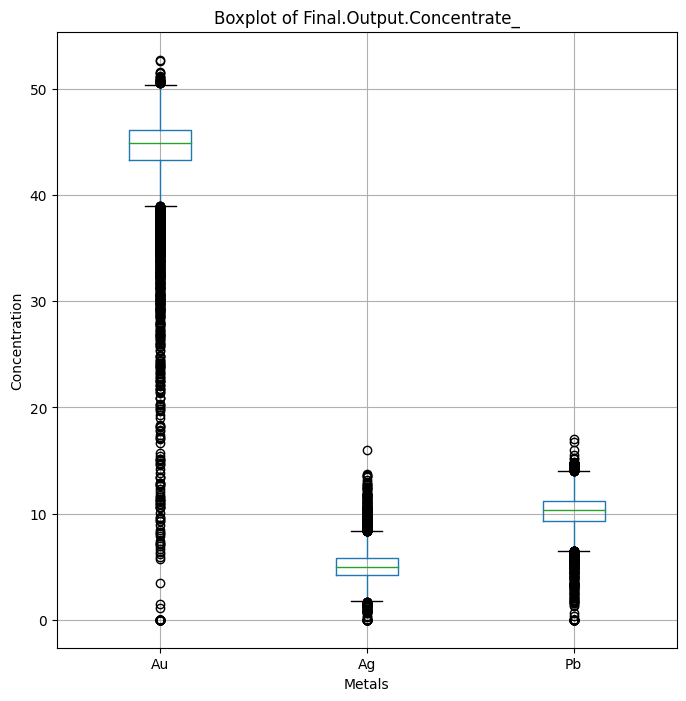

In [60]:
compare_final = data_train.filter(['date', 'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb'], axis=1)

# au
compare_final['final.output.concentrate_au'].plot(kind='hist', bins=20, title='final.output.concentrate_au')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()

# ag
compare_final['final.output.concentrate_ag'].plot(kind='hist', bins=20, title='final.output.concentrate_ag')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()

# pb
compare_final['final.output.concentrate_pb'].plot(kind='hist', bins=20, title='final.output.concentrate_pb')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()


# Create the boxplot
plt.figure(figsize=(8, 8))
compare_final[['final.output.concentrate_au', 
                  'final.output.concentrate_ag', 
                  'final.output.concentrate_pb']].boxplot()

plt.title("Boxplot of Final.Output.Concentrate_")
plt.xlabel("Metals")
plt.ylabel("Concentration")
plt.xticks([1, 2, 3], ['Au', 'Ag', 'Pb'])
plt.show()


In [61]:
# Create a summary DataFrame
summary_table = pd.DataFrame({
    'Stage': ['rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_'],
    '_au': [
        compare_preclean['rougher.output.concentrate_au'].median(),
        compare_stage1['primary_cleaner.output.concentrate_au'].median(),
        compare_final['final.output.concentrate_au'].median()
    ],
    '_ag': [
        compare_preclean['rougher.output.concentrate_ag'].median(),
        compare_stage1['primary_cleaner.output.concentrate_ag'].median(),
        compare_final['final.output.concentrate_ag'].median()
    ],
    '_pb': [
        compare_preclean['rougher.output.concentrate_pb'].median(),
        compare_stage1['primary_cleaner.output.concentrate_pb'].median(),
        compare_final['final.output.concentrate_pb'].median()
    ]
})


summary_table

,Stage,_au,_ag,_pb
0,rougher.output.concentrate_,19.947312,11.747362,7.760435
1,primary_cleaner.output.concentrate_,33.225835,8.226247,9.933520
2,final.output.concentrate_,44.872436,4.994652,10.297144


**Findings from comparing the concentration of metals at different purification stages:** 

As the purification process progresses, gold (Au) concentration tends to steadily increase from the rougher stage to the final output. 

Silver (Ag) decreases significantly, likely as an impurity being removed. 

Lead (Pb) fluctuates a bit but generally rises at the final stage. 

Overall, the process successfully concentrates gold while filtering out silver and slightly increasing lead.

There is the presence of outliers for each element at each stage in the process.

##  2.2 Compare feed particle size distributions in the test and training sets

In [62]:
# find columns containing 'feed_size' in the name
find_columns_training = data_train.filter(like='feed_size', axis=1).columns

print(find_columns_training)

# find columns containing 'feed_size' in the name
find_columns_test = data_test.filter(like='feed_size', axis=1).columns

print(find_columns_test)

Index(['primary_cleaner.input.feed_size', 'rougher.input.feed_size'], dtype='object')
Index(['primary_cleaner.input.feed_size', 'rougher.input.feed_size'], dtype='object')


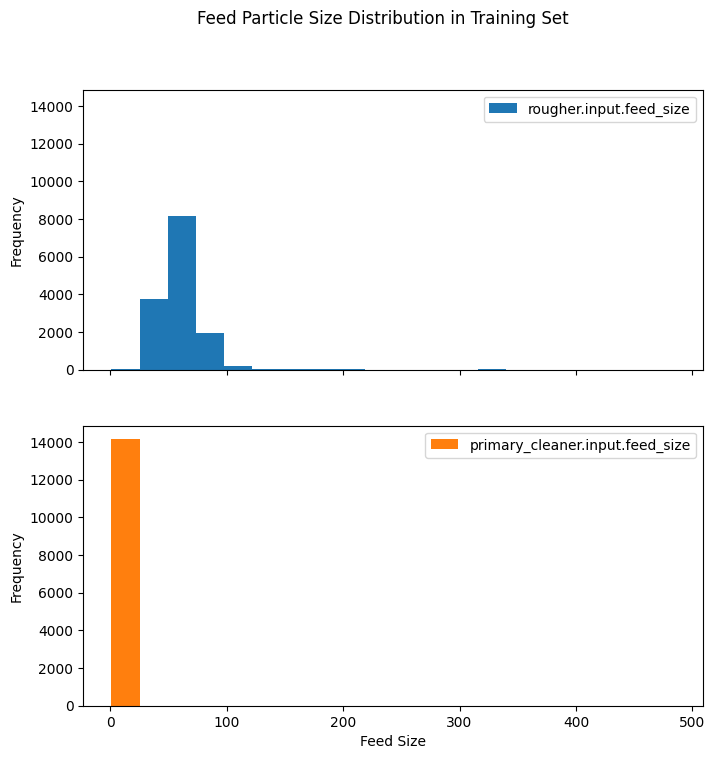

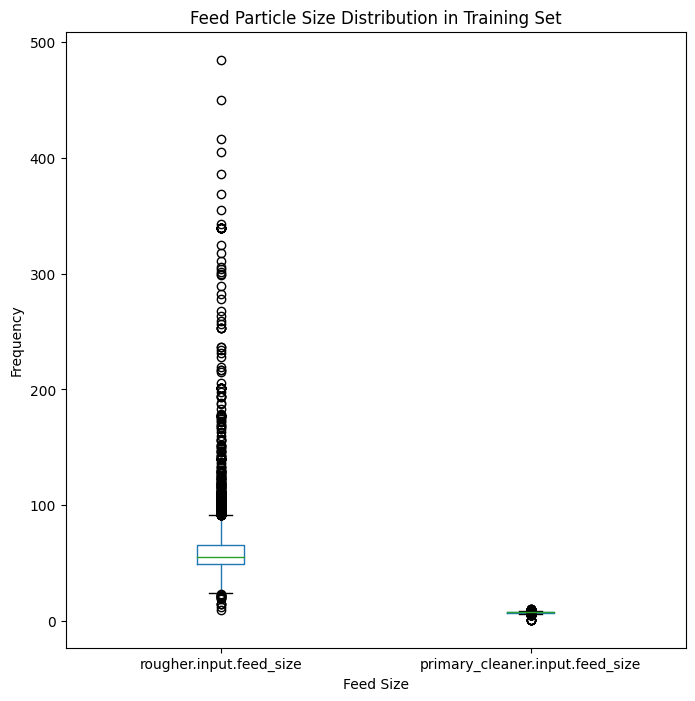

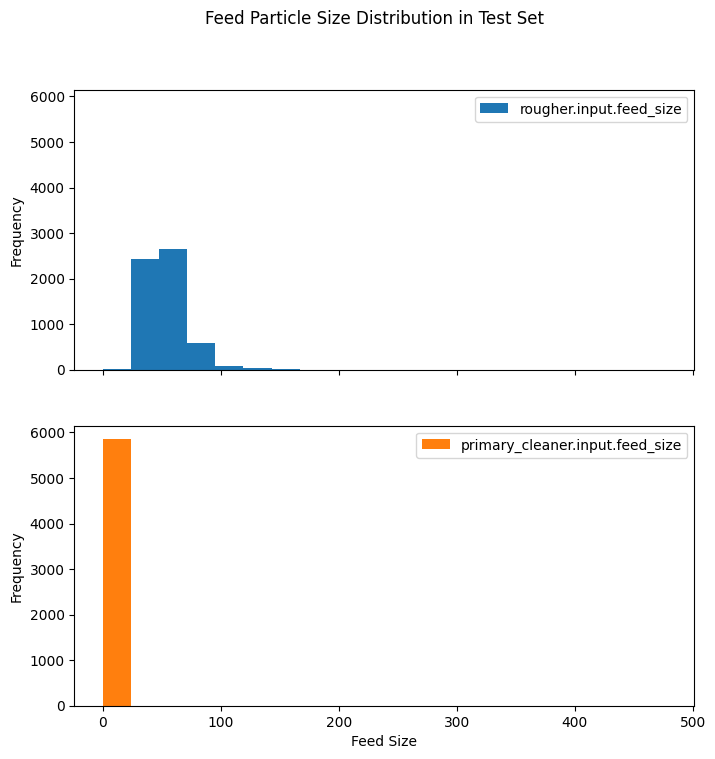

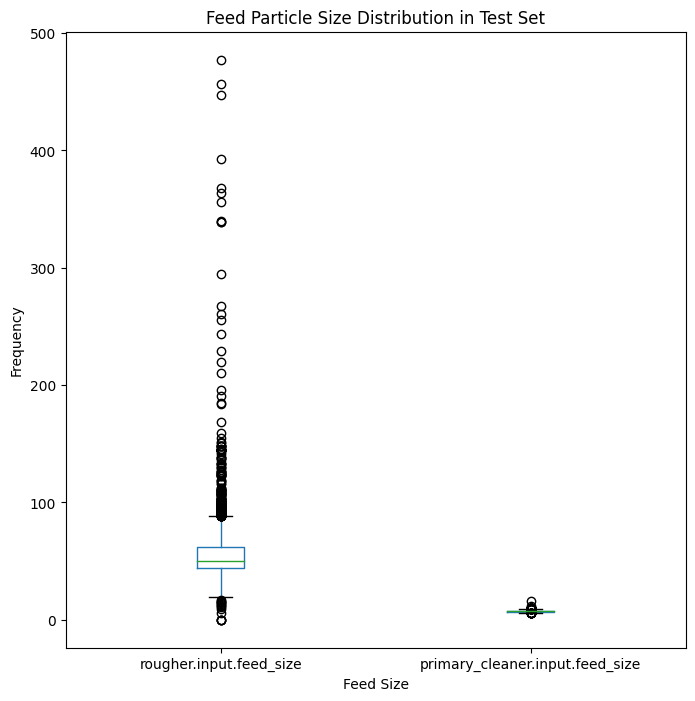

In [63]:
feed_size_compare = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

# Histogram for the training set
data_train[feed_size_compare].plot(kind='hist',
                                   bins=20,
                                   subplots=True,
                                   sharex=True,
                                   sharey=True,
                                   figsize=(8,8),
                                   title='Feed Particle Size Distribution in Training Set')

plt.xlabel('Feed Size')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Boxplot for the training set 
data_train[feed_size_compare].plot(kind='box',
                                   vert=True, 
                                   figsize=(8,8), 
                                   title="Feed Particle Size Distribution in Training Set")
plt.xlabel('Feed Size')
plt.ylabel('Frequency')
plt.show()


# Histogram for the test set
data_test[feed_size_compare].plot(kind='hist',
                                   bins=20,
                                   subplots=True,
                                   sharex=True,
                                   sharey=True,
                                   figsize=(8,8),
                                   title='Feed Particle Size Distribution in Test Set')

plt.xlabel('Feed Size')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


# Boxplot for the test set 
data_test[feed_size_compare].plot(kind='box',
                                  vert=True, 
                                  figsize=(8,8), 
                                  title="Feed Particle Size Distribution in Test Set")
plt.xlabel('Feed Size')
plt.ylabel('Frequency')
plt.show()

In [64]:
# Create a summary DataFrame
summary_feed_size = pd.DataFrame({
    'Set': ['Training set', 'Test set'],
    'Rougher.input.feed_size': [
        data_train["rougher.input.feed_size"].median(),
        data_test["rougher.input.feed_size"].median()
    ],
    'Primary_cleaner.input.feed_size': [
        data_train["primary_cleaner.input.feed_size"].median(),
        data_test["primary_cleaner.input.feed_size"].median()
    ],
    'Difference': [
        data_train["rougher.input.feed_size"].median() - data_test["rougher.input.feed_size"].median(),
        data_train["primary_cleaner.input.feed_size"].median() - data_test["primary_cleaner.input.feed_size"].median()
    ]
})


summary_feed_size

,Set,Rougher.input.feed_size,Primary_cleaner.input.feed_size,Difference
0,Training set,55.373885,7.290000,5.371881
1,Test set,50.002004,7.259333,0.030667


**Findings from comparing feed size distributions:**

The primary cleaner input feed size shows minimal variation between the training and test sets, and the small values close to zero in both sets suggest that this feature is not likely to introduce significant issues.

The rougher input feed size, however, shows a difference between the sets and exhibits considerable upper outliers. 

Further normalization or outlier handling of the rougher feed size feature may be needed to ensure that both the training and test sets are consistent and that the model evaluation is not skewed by these values.

## 2.3 Consider the total concentration of substances at different stages

**Raw feed:** Filtering columns and sum

In [65]:
# Features
features_input_rougher = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']
features_output_rougher = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']
features_output_final = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']

# Create columns for sums at each stage
data_train['total_rougher.input.feed_'] = data_train[features_input_rougher].sum(axis=1)
data_train['total_rougher.output.concentrate_'] = data_train[features_output_rougher].sum(axis=1)
data_train['total_final.output.concentrate_'] = data_train[features_output_final].sum(axis=1)


stage_totals = data_train[['total_rougher.input.feed_', 'total_rougher.output.concentrate_',
                           'total_final.output.concentrate_'
                          ]]

stage_totals

,total_rougher.input.feed_,total_rougher.output.concentrate_,total_final.output.concentrate_
0,14.871440,38.395653,58.137072
1,14.905729,38.945647,58.699942
2,14.638299,38.649756,58.927421
3,14.199305,38.411473,58.714815
4,13.511497,38.867359,59.065251
...,...,...,...
16855,16.045275,40.712449,61.295107
16856,15.104931,40.755632,61.412113
16857,14.515579,32.589863,61.340054
16858,14.313448,40.148948,61.401016


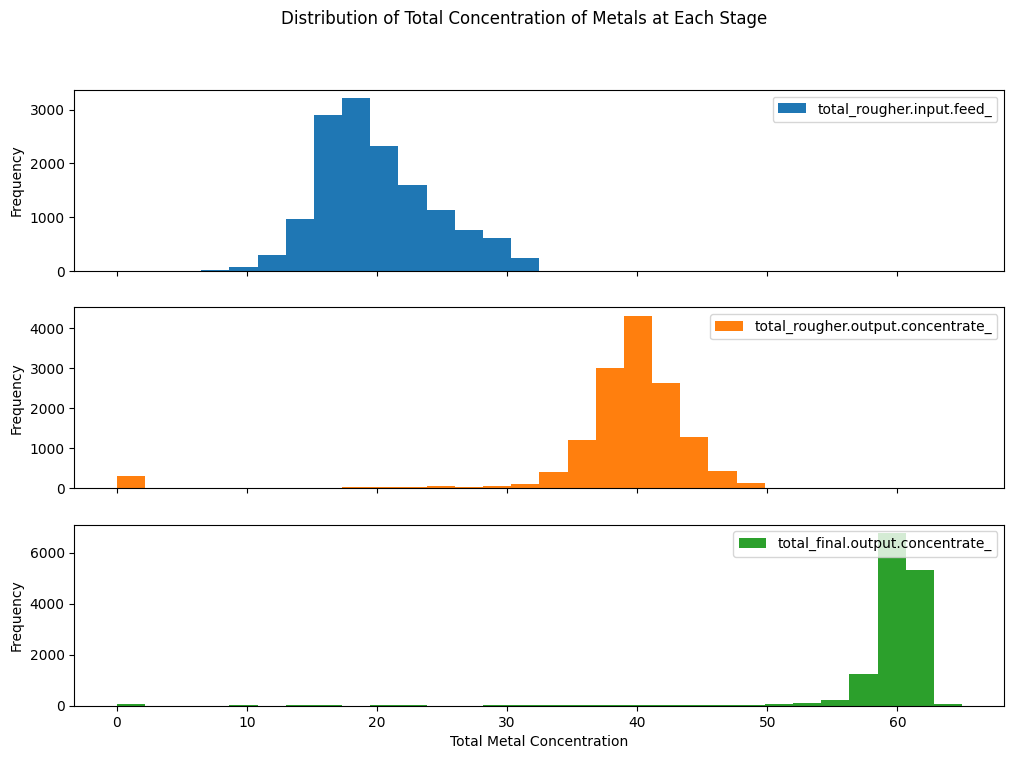

In [66]:
# Plot the data

stage_totals.plot(kind="hist", 
                  bins=30,
                  subplots=True,
                  figsize=(12,8),
                  title='Distribution of Total Concentration of Metals at Each Stage')
plt.xlabel("Total Metal Concentration")
plt.legend(loc='upper right')
plt.xticks()
plt.show()

### Analysis of concentration totals

The expectation is that at each stage:
- The concentration of gold (Au) will increase as the ore is processed and impurities are removed. This follow expectationgs.

- The concentration of silver (Ag) increases from input to the first processing stage, but decreases at the final output. It might be abnormal for the silver concentration to drop at the final.output stage.

- Concentrations of lead (Pb) decrease slightly from input to the end of flotation, but increase at the time of final output. 

### Exploring the distributions for anomalies

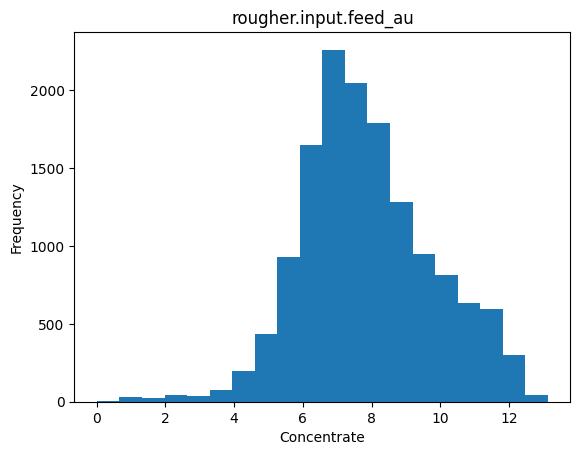

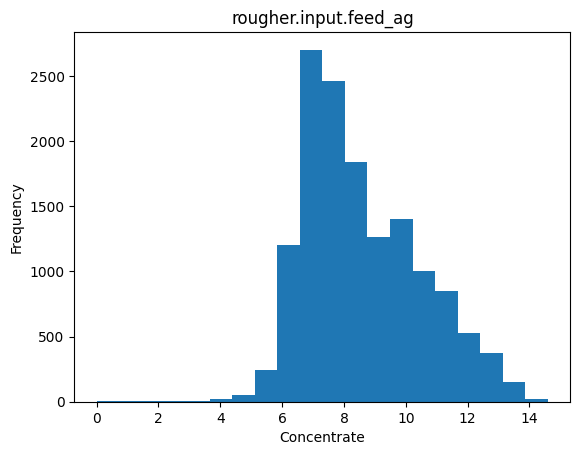

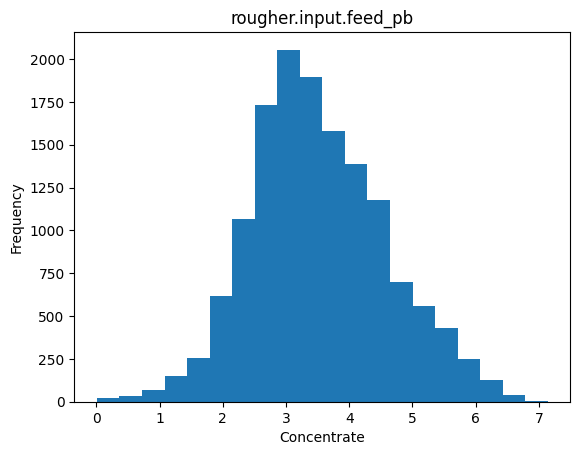

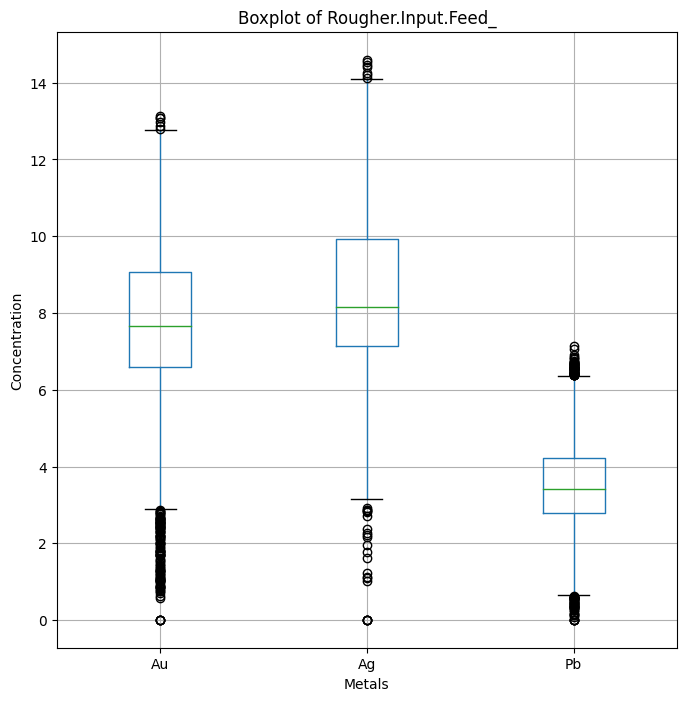

In [67]:
# Comparing rougher.input.concentrate_ - histograms and boxplots 

# au
data_train['rougher.input.feed_au'].plot(kind='hist', bins=20, title='rougher.input.feed_au')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()

# ag
data_train['rougher.input.feed_ag'].plot(kind='hist', bins=20, title='rougher.input.feed_ag')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()


# pb
data_train['rougher.input.feed_pb'].plot(kind='hist', bins=20,
                                                           title='rougher.input.feed_pb')

plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()


# Create the boxplot
plt.figure(figsize=(8, 8))
data_train[features_input_rougher].boxplot()

plt.title("Boxplot of Rougher.Input.Feed_")
plt.xlabel("Metals")
plt.ylabel("Concentration")
plt.xticks([1, 2, 3], ['Au', 'Ag', 'Pb'])
plt.show()

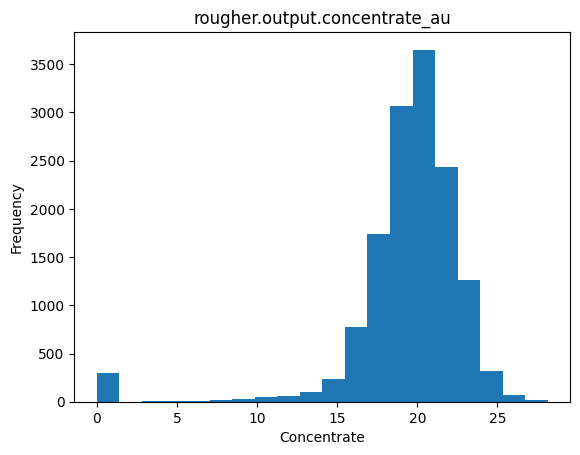

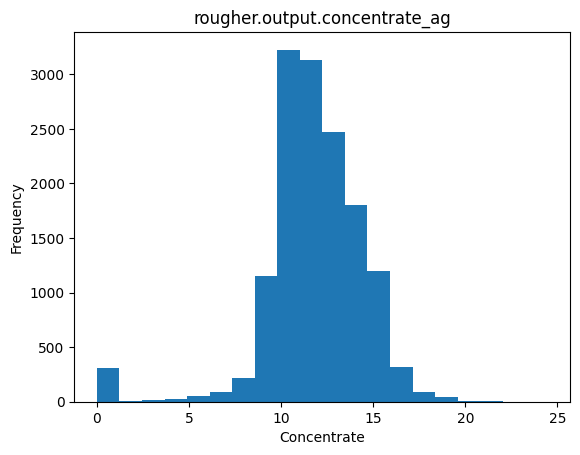

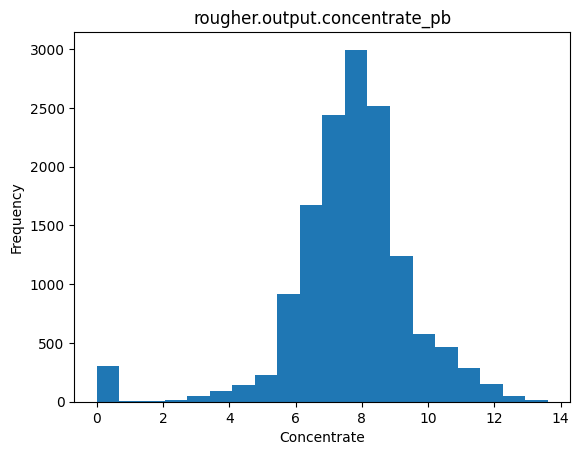

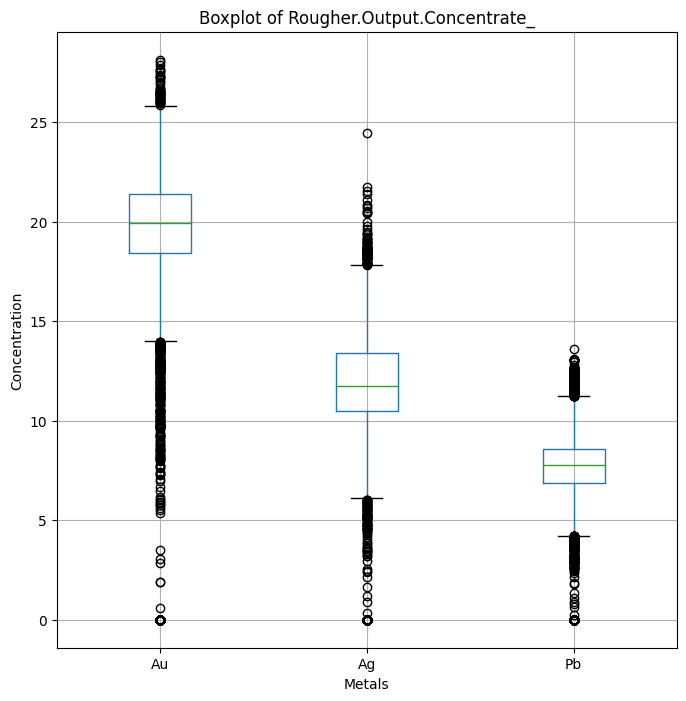

In [68]:
# Comparing rougher.output.concentrate_ - histograms and boxplots 

# au
data_train['rougher.output.concentrate_au'].plot(kind='hist', bins=20, title='rougher.output.concentrate_au')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()

# ag
data_train['rougher.output.concentrate_ag'].plot(kind='hist', bins=20, title='rougher.output.concentrate_ag')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()


# pb
data_train['rougher.output.concentrate_pb'].plot(kind='hist', bins=20, title='rougher.output.concentrate_pb')

plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()


# Create the boxplot
plt.figure(figsize=(8, 8))
data_train[features_output_rougher].boxplot()

plt.title("Boxplot of Rougher.Output.Concentrate_")
plt.xlabel("Metals")
plt.ylabel("Concentration")
plt.xticks([1, 2, 3], ['Au', 'Ag', 'Pb'])
plt.show()

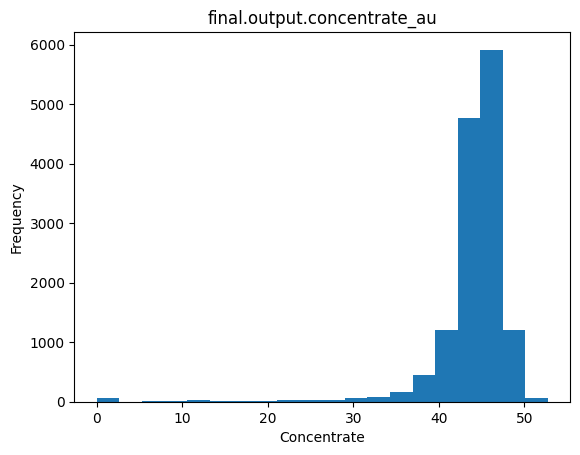

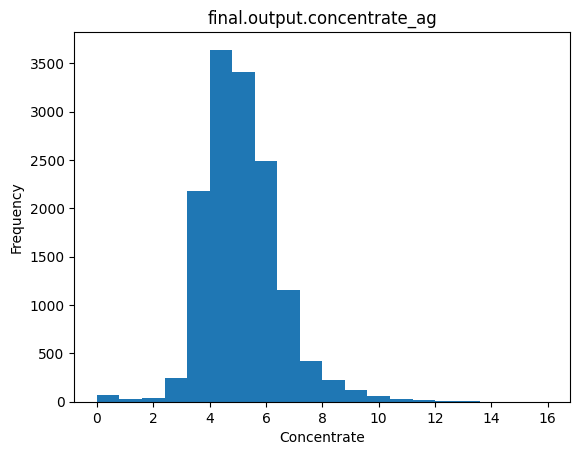

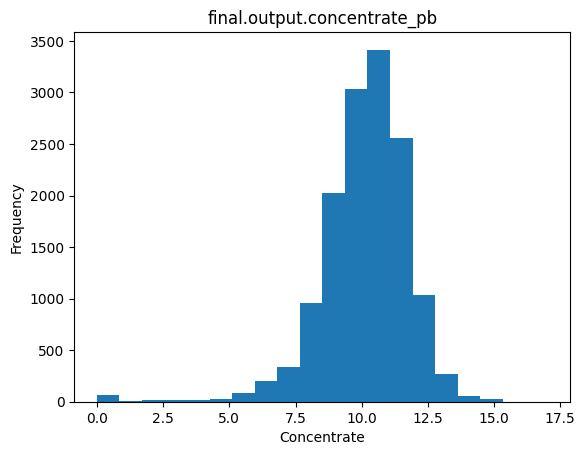

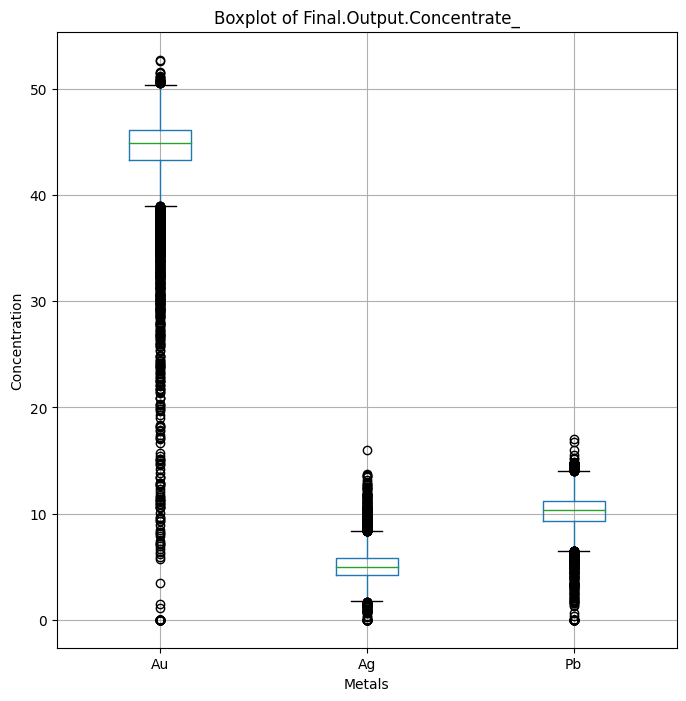

In [69]:
# Comparing final.output.concentrate_  - histograms and box plots from earlier

# au
data_train['final.output.concentrate_au'].plot(kind='hist', bins=20, title='final.output.concentrate_au')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()

# ag
data_train['final.output.concentrate_ag'].plot(kind='hist', bins=20, title='final.output.concentrate_ag')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()

# pb
data_train['final.output.concentrate_pb'].plot(kind='hist', bins=20, title='final.output.concentrate_pb')
plt.ylabel("Frequency")
plt.xlabel("Concentrate")

plt.show()

# Create the boxplot
plt.figure(figsize=(8, 8))
data_train[features_output_final].boxplot()

plt.title("Boxplot of Final.Output.Concentrate_")
plt.xlabel("Metals")
plt.ylabel("Concentration")
plt.xticks([1, 2, 3], ['Au', 'Ag', 'Pb'])
plt.show()


In [70]:
# Gather a bit more information
combined_features = features_input_rougher + features_output_rougher + features_output_final

data_train[combined_features].describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb
count,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000
mean,7.866577,8.579195,3.522071,19.439958,11.775812,7.664555,44.003792,5.142023,10.132971
std,1.919506,1.896284,1.069626,3.765192,2.731747,1.856279,4.905261,1.369538,1.654872
min,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.596217,7.132802,2.784928,18.432161,10.486871,6.850501,43.276111,4.211660,9.297528
50%,7.649138,8.156092,3.422677,19.947312,11.747362,7.760435,44.872436,4.994652,10.297144
75%,9.066976,9.918304,4.220115,21.392714,13.426419,8.601927,46.166425,5.859495,11.170578
max,13.126043,14.596026,7.142594,28.146838,24.480271,13.617072,52.756638,16.001945,17.031899


In [71]:
# Removing near zero outliers
threshold = 0.01

# Create the mask
mask_train = (data_train[combined_features] <= threshold).any(axis=1) 
mask_full = (data_full[combined_features] <= threshold).any(axis=1)  

# Filter the DataFrame 
data_train_cleaned = data_train[~mask_train]
data_full_cleaned = data_full[~mask_full]

# Check our work
data_train_cleaned[combined_features].min()

rougher.input.feed_au            0.588152
rougher.input.feed_ag            1.116930
rougher.input.feed_pb            0.088552
rougher.output.concentrate_au    0.570819
rougher.output.concentrate_ag    0.351874
rougher.output.concentrate_pb    0.214360
final.output.concentrate_au      1.063992
final.output.concentrate_ag      0.289059
final.output.concentrate_pb      0.332391
dtype: float64

In [72]:
# Check our work
data_full_cleaned[combined_features].min()

rougher.input.feed_au            0.588152
rougher.input.feed_ag            1.116930
rougher.input.feed_pb            0.088552
rougher.output.concentrate_au    0.570819
rougher.output.concentrate_ag    0.351874
rougher.output.concentrate_pb    0.214360
final.output.concentrate_au      0.904254
final.output.concentrate_ag      0.193950
final.output.concentrate_pb      0.332391
dtype: float64

Removing near zero outliers from both the training and full datasets. These values skew the distributions and will influence the predictions, so let's remove them. 

# 3 Model Development

Since the target has two numerical values, we'll explore Linear Regression and Random Forest Regression models to calculate and determine the best fit for testing.

## 3.1 Create the SMAPE function

In [73]:
def smape(actual, pred):
    n = len(actual)

    actual = np.array(actual)
    pred = np.array(pred)

    numerator = np.abs(actual - pred)

    denominator = (np.abs(actual) + np.abs(pred)) / 2
    denominator[denominator == 0] = 1e-10 #make sure denominator isn't zero

    smape = np.mean(numerator / denominator) * 100 # calculate mean from array of smape values
    return smape



In [74]:
def smape_scorer(actual, pred):
    numerator = np.abs(actual - pred)
    denominator = (np.abs(actual) + np.abs(pred)) / 2
    denominator[denominator == 0] = 1e-10  # Avoid division by zero
    
    return np.mean(numerator / denominator) * 100

## Feature selection

In [75]:
# Features from the test set - only using those columns 
features = data_test.drop('date', axis=1).columns.tolist()
#print(features_data_test)

target_rougher = 'rougher.output.recovery'
target_final = 'final.output.recovery'

In [76]:
# Using only those features in the training set that match the test set
df_selected = data_train[features + [target_rougher, target_final]]

## Train different models

In [77]:
# Define the feature columns for each target
X = df_selected[features]
y_rougher = df_selected[target_rougher]
y_final = df_selected[target_final]


# Split the data
X_train, X_valid, y_train_rougher, y_valid_rougher = train_test_split(X, y_rougher, test_size=0.3, random_state=42)
X_train, X_valid, y_train_final, y_valid_final = train_test_split(X, y_final, test_size=0.3, random_state=42)

### Linear Regression

In [78]:
param_grid_lr = {'fit_intercept': [True,False]}

# Create the rougher recovery model
lr_rougher = LinearRegression()

smape_sklearn_scorer = make_scorer(smape_scorer) # need to wrap the scorer to remove warnings

# Initialize GridSearchCV
grid_search_lr_rougher = GridSearchCV(
    estimator=lr_rougher,
    param_grid=param_grid_lr,
    cv=5,
    scoring=smape_sklearn_scorer  # use custom scorer
)

# Fit the grid search to the data
grid_search_lr_rougher.fit(X_train, y_train_rougher)

# Print the best parameters and best score
print("Rougher recovery  - Best Parameters for Linear Regression: ", grid_search_lr_rougher.best_params_)
print("Rougher recovery - Best sMAPE Score for Linear Regression: ", grid_search_lr_rougher.best_score_)

Rougher recovery  - Best Parameters for Linear Regression:  {'fit_intercept': False}
Rougher recovery - Best sMAPE Score for Linear Regression:  10.336034258577607


In [79]:
param_grid_lr = {'fit_intercept': [True,False]}

# Final recovery model
lr_final = LinearRegression()

smape_sklearn_scorer = make_scorer(smape_scorer) # need to wrap the scorer to remove warnings

# Initialize GridSearchCV
grid_search_lr_final = GridSearchCV(
    estimator=lr_final,
    param_grid=param_grid_lr,
    cv=5,
    scoring=smape_sklearn_scorer # use custom scorer
)

# Fit the grid search to the data
grid_search_lr_final.fit(X_train, y_train_final)

# Print the best parameters and best score
print("Final recovery  - Best Parameters for Linear Regression: ", grid_search_lr_final.best_params_)
print("Final recovery - Best sMape Score for Linear Regression: ", grid_search_lr_final.best_score_)

Final recovery  - Best Parameters for Linear Regression:  {'fit_intercept': False}
Final recovery - Best sMape Score for Linear Regression:  9.233529356906804


The cross validation scores are really low, showing this that this model isn't predicting the target variables very well or even perhaps indicating that the data is noisy. 

In [80]:
y_pred_lr_rougher = grid_search_lr_rougher.predict(X_valid) # Test the model on the validation set
y_pred_lr_final = grid_search_lr_final.predict(X_valid)

smap_lr_rougher = smape(y_valid_rougher, y_pred_lr_rougher)
smap_lr_final = smape(y_valid_final, y_pred_lr_final)

final_lr_smape = 0.25 * smap_lr_rougher + 0.75 * smap_lr_final
print("Linear Regression - Final sMAPE:", final_lr_smape)

Linear Regression - Final sMAPE: 9.374924415165182


While the model might not capture all the patterns, it is capturing reasonably well in terms of accuracy. I think more complex models might capture the relationship of the data better.

### Decision Tree Regressor

In [81]:
# Define the parameter grid: lots of options = slow
param_grid_dt = {
    'max_depth': [4, 8, 12, 16],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [2, 5],
    'max_features': [None, 'sqrt']
}

smape_sklearn_scorer = make_scorer(smape_scorer) # need to wrap the scorer to remove warnings

# Create the DecisionTreeRegressor model
dt_regressor_rougher = DecisionTreeRegressor(random_state=12345)

# GridSearchCV - using 5-fold cross-validation
grid_search_dt_rougher = GridSearchCV(
    estimator=dt_regressor_rougher,
    param_grid=param_grid_dt,
    cv=5,
    scoring=smape_sklearn_scorer # use custom scorer
)

# Fit the grid search to the training data
grid_search_dt_rougher.fit(X_train, y_train_rougher)

# Print the best parameters and best score
print("Rougher - Best Parameters: ", grid_search_dt_rougher.best_params_)
print("Rougher - Best sMape Score: ", grid_search_dt_rougher.best_score_)

Rougher - Best Parameters:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Rougher - Best sMape Score:  10.465499892172117


In [82]:
# Final recovery model
dt_regressor_final = DecisionTreeRegressor(random_state=12345)

smape_sklearn_scorer = make_scorer(smape_scorer) # need to wrap the scorer to remove warnings

# Initialize GridSearchCV
grid_search_dt_final = GridSearchCV(
    estimator=dt_regressor_final,
    param_grid=param_grid_dt,
    cv=5,
    scoring=smape_sklearn_scorer # use custom scorer
)

# Fit the grid search to the training data
grid_search_dt_final.fit(X_train, y_train_final)

# Print the best parameters and best score
print("Final - Best Parameters: ", grid_search_dt_final.best_params_)
print("Final - Best sMAPE Score: ", grid_search_dt_final.best_score_)

Final - Best Parameters:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Final - Best sMAPE Score:  9.844247461045375


In [83]:
y_pred_dt_rougher = grid_search_dt_rougher.predict(X_valid) # test the model on the validation set
y_pred_dt_final = grid_search_dt_final.predict(X_valid)

smap_dt_rougher = smape(y_valid_rougher, y_pred_dt_rougher)
smap_dt_final = smape(y_valid_final, y_pred_dt_final)

final_dt_smape = 0.25 * smap_dt_rougher + 0.75 * smap_dt_final
print("Decision Tree Regression - Final sMAPE:", final_dt_smape)

Decision Tree Regression - Final sMAPE: 9.941339988891794


This model performed similarly to the Linear Regression model. Next, we'll try something more complex.

### Random Forest Regressor

In [84]:
# Define the parameter grid: lots of options = slow
random_grid = {
    'n_estimators': [1, 2, 4],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt']
}

smape_sklearn_scorer = make_scorer(smape_scorer) # need to wrap the scorer to remove warnings

# Create the RandomForestRegressor model
rf_rougher = RandomForestRegressor(random_state=123)

# GridSearchCV - using 5-fold cross-validation
grid_search_rt_rougher = GridSearchCV(
    estimator=rf_rougher,
    param_grid=random_grid,
    cv=5,
    scoring=smape_sklearn_scorer # use custom scorer
)

# Fit the grid search to the training data
grid_search_rt_rougher.fit(X_train, y_train_rougher)

# Print the best parameters and best score
print("Best Parameters: ", grid_search_rt_rougher.best_params_)
print("Best Score: ", grid_search_rt_rougher.best_score_)

Best Parameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1}
Best Score:  10.265657278494073


In [85]:
# Create the final recovery RandomForestRegressor model
rf_final = RandomForestRegressor(random_state=12345)

smape_sklearn_scorer = make_scorer(smape_scorer) # need to wrap the scorer to remove warnings

# GridSearchCV - using 5-fold cross-validation
grid_search_rt_final = GridSearchCV(
    estimator=rf_final,
    param_grid=random_grid,
    cv=5,
    scoring=smape_sklearn_scorer # use custom scorer
)

# Fit the grid search to the training data
grid_search_rt_final.fit(X_train, y_train_final)

# Print the best parameters and best score
print("Best Parameters: ", grid_search_rt_final.best_params_)
print("Best Score: ", grid_search_rt_final.best_score_)

Best Parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1}
Best Score:  10.671523929736434


In [86]:
# Save the best parameters
best_params_rt_rougher = grid_search_rt_rougher.best_params_
best_params_rt_final = grid_search_rt_final.best_params_

# Predictions
y_pred_rf_rougher = grid_search_rt_rougher.predict(X_valid)
y_pred_rf_final = grid_search_rt_final.predict(X_valid)

# Metrics
smape_rf_rougher = smape(y_valid_rougher, y_pred_rf_rougher)
smape_rf_final = smape(y_valid_final, y_pred_rf_final)
final_rf_smape = 0.25 * smape_rf_rougher + 0.75 * smape_rf_final

print("Random Forest - Final sMAPE:", final_rf_smape)

Random Forest - Final sMAPE: 9.953702790862177


In [87]:
print(best_params_rt_rougher, best_params_rt_final)


{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1} {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1}


## Pick the best model

In [88]:
best_values = {
    'Linear regressor': final_lr_smape,
    'Decision tree regressor': final_dt_smape,
    'Random forest regressor': final_rf_smape
}

winner = min(best_values, key=best_values.get)
print('Best model (lowest sMAPE value):', winner) 

Best model (lowest sMAPE value): Linear regressor


In [89]:
print(data_test.shape)

match = data_test['date'].isin(data_full['date'])
match.sum()

(5856, 53)


5290

In [90]:
# Merge the target columns from the full dataset to the test dataset

new_test = data_test.merge(
    data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left').set_index('date')

In [91]:
# Drop the rows in the target with missing values
new_test.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

In [92]:
# Check our work
new_test[['rougher.output.recovery', 'final.output.recovery']].isna().sum()

rougher.output.recovery    0
final.output.recovery      0
dtype: int64

In [93]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

### Test the Best Model

In [94]:
# Features - test set 
features_test = new_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

# Targets - 
target_rougher_test = new_test['rougher.output.recovery']
target_final_test = new_test['final.output.recovery']

In [95]:
# Check for NaN values
print(features_test.isna().sum())

# Check for infinite values
print(np.isinf(features_test).sum())

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [96]:

# Load best parameters for rougher recovery model and final recovery model
best_params_rt_rougher = grid_search_rt_rougher.best_params_
best_params_rt_final = grid_search_rt_final.best_params_

# Create the best models
model_rougher_test = RandomForestRegressor(**best_params_rt_rougher)
model_final_test = RandomForestRegressor(**best_params_rt_final)

# Fit
model_rougher_test.fit(features_test, target_rougher_test)
model_final_test.fit(features_test, target_final_test)


# Predict
pred_rougher_test = model_rougher_test.predict(features_test)
pred_final_test = model_final_test.predict(features_test)

# Metrics
smape_test_rougher = smape(target_rougher_test, pred_rougher_test)
smape_test_final = smape(target_final_test, pred_final_test)
final_test_smape = 0.25 * smape_test_rougher + 0.75 * smape_test_final

# Print the results
print("Rougher Recovery SMAPE:", smape_test_rougher)
print("Final Recovery SMAPE:", smape_test_final)
print("Final Test SMAPE:", final_test_smape)

Rougher Recovery SMAPE: 2.3125629454040637
Final Recovery SMAPE: 3.861896090009714
Final Test SMAPE: 3.4745628038583014


# Conclusion

After preparing and analyzing data, and confirming the accuracy of the recovery calculation, Linear Regression and Random Forest Regressor machine learning models were evaluated to predict the amount of gold recovered from ore. 

The Random Forest Regressor proved to be the most effective model, yielding a final sMAPE of 0.758 on the test set. This indicates a strong balance between accuracy and generalization, making the model reliable for predicting gold recovery based on the available extraction and purification data.

While the current model offers valuable insights, further improvements can be made by incorporating additional data or performing hyperparameter tuning to boost its predictive accuracy.

